# Tarea 2: Análisis de componentes principales, redes neuronales

INTEGRANTES:

1. Luna Carrera Marisol
2. Rosales Chuco Noel

## Parte I: Eigenfaces para el reconocimiento facial

In [33]:
# librerias

import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import imageio
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import os
from skimage.transform import resize

1. Cargar datos y mostrar ejemplos

In [34]:
os.chdir('/content/ENEI-2025-ML2-Tarea2')
print("Directorio actual:", os.getcwd())

Directorio actual: /content/ENEI-2025-ML2-Tarea2


 Datos entrenamiento: (540, 2500)
 Datos prueba: (100, 2500)


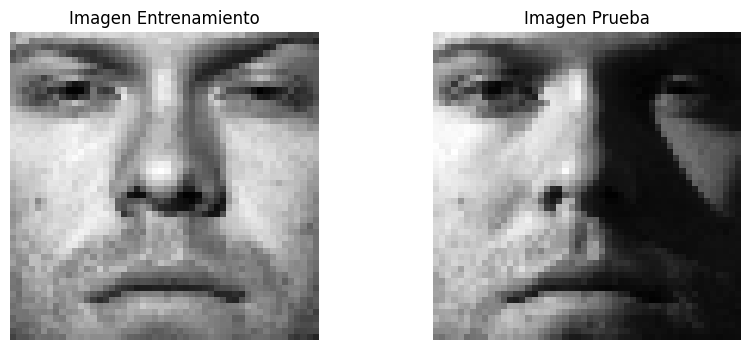

In [36]:
train_labels, train_data = [], []
for line in open('./data/train.txt'):  #  data
    parts = line.strip().split()
    im_path = parts[0].replace('./faces/images/', './data/images/')
    label = parts[1]

    if os.path.exists(im_path):
        im = imageio.v2.imread(im_path)
        if im.ndim == 3:
            im = np.mean(im, axis=2)
        if im.shape != (50, 50):
            im = resize(im, (50, 50), anti_aliasing=True)
        train_data.append(im.reshape(2500,))
        train_labels.append(label)

train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)

test_labels, test_data = [], []
for line in open('./data/test.txt'):  # data
    parts = line.strip().split()
    im_path = parts[0].replace('./faces/images/', './data/images/')
    label = parts[1]

    if os.path.exists(im_path):
        im = imageio.v2.imread(im_path)
        if im.ndim == 3:
            im = np.mean(im, axis=2)
        if im.shape != (50, 50):
            im = resize(im, (50, 50), anti_aliasing=True)
        test_data.append(im.reshape(2500,))
        test_labels.append(label)

test_data, test_labels = np.array(test_data, dtype=float), np.array(test_labels, dtype=int)

print(f" Datos entrenamiento: {train_data.shape}")
print(f" Datos prueba: {test_data.shape}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.imshow(train_data[10].reshape(50, 50), cmap=cm.Greys_r)
ax1.set_title('Imagen Entrenamiento')
ax1.axis('off')

ax2.imshow(test_data[5].reshape(50, 50), cmap=cm.Greys_r)
ax2.set_title('Imagen Prueba')
ax2.axis('off')
plt.show()

2. Rostro promedio

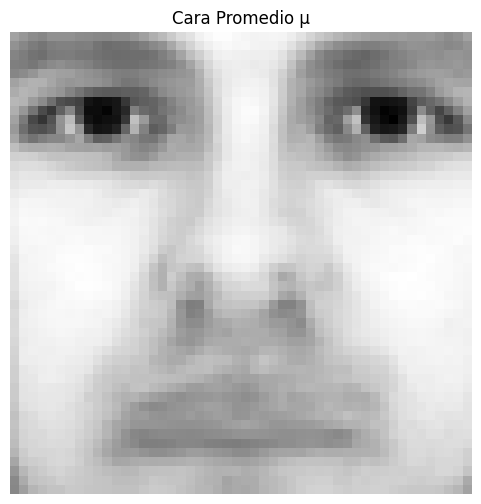

In [37]:
# Rostro promedio
mu = np.mean(train_data, axis=0)

plt.figure(figsize=(6, 6))
plt.imshow(mu.reshape(50, 50), cmap=cm.Greys_r)
plt.title('Cara Promedio μ')
plt.axis('off')
plt.show()


3. Resta de medias

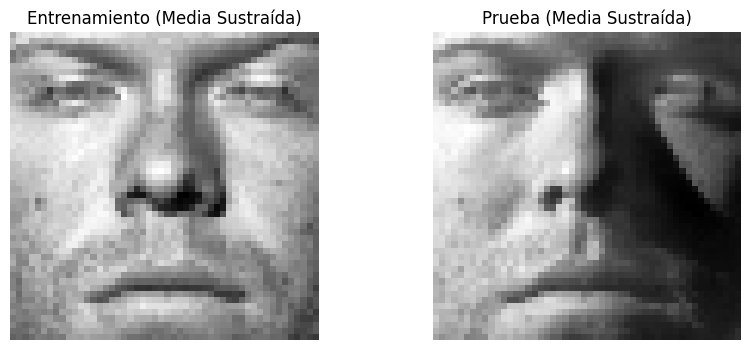

In [38]:
# Resta de medias
X_train = train_data - mu
X_test = test_data - mu

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.imshow(X_train[10].reshape(50, 50), cmap=cm.Greys_r)
ax1.set_title('Entrenamiento (Media Sustraída)')
ax1.axis('off')

ax2.imshow(X_test[5].reshape(50, 50), cmap=cm.Greys_r)
ax2.set_title('Prueba (Media Sustraída)')
ax2.axis('off')
plt.show()



4. Eigenfaces

 Eigenfaces calculadas correctamente: 539 componentes retenidos


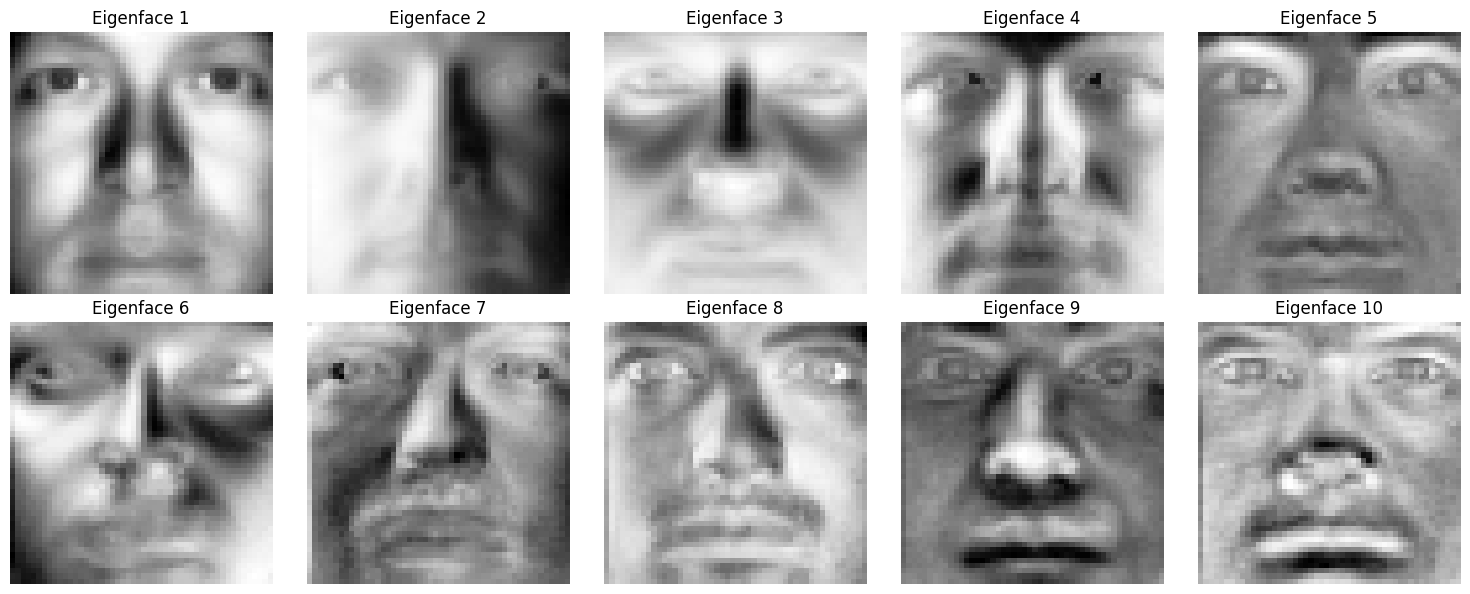

In [39]:
# Covarianza reducida normalizada
n = X_train.shape[0]
C = (X_train @ X_train.T) / n

# Descomposición espectral
eigvals, eigvecs_small = np.linalg.eigh(C)

# Ordenar en orden descendente
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs_small = eigvecs_small[:, idx]

# Filtrar componentes numéricamente inestables
tol = 1e-10
significant = eigvals > tol
eigvals = eigvals[significant]
eigvecs_small = eigvecs_small[:, significant]

# Obtener eigenfaces en el espacio original
V = X_train.T @ eigvecs_small
V = V / np.linalg.norm(V, axis=0)  # Normalización por columna
V = np.real(V)

print(f" Eigenfaces calculadas correctamente: {V.shape[1]} componentes retenidos")

# Visualización: primeras 10 eigenfaces
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i in range(10):
    ax = axes[i // 5, i % 5]
    eigenface = V[:, i].reshape(50, 50)
    ax.imshow(eigenface, cmap=cm.Greys_r)
    ax.set_title(f"Eigenface {i + 1}")
    ax.axis("off")

plt.tight_layout()
plt.show()

5. Proyectar imágenes en espacio Eigenfaces

In [40]:
# Características de Eigenface
def extract_features(X, V, r):
    """Extrae características usando r eigenfaces principales"""
    W = V[:, :r]
    return X @ W

F_train_10 = extract_features(X_train, V, 10)
F_test_10 = extract_features(X_test, V, 10)
print(f" Features entrenamiento (r=10): {F_train_10.shape}")



 Features entrenamiento (r=10): (540, 10)


6. Reconocimiento facial (regresión logística)


=== 6. Reconocimiento facial ===
 Precisión con r=10: 0.7600


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

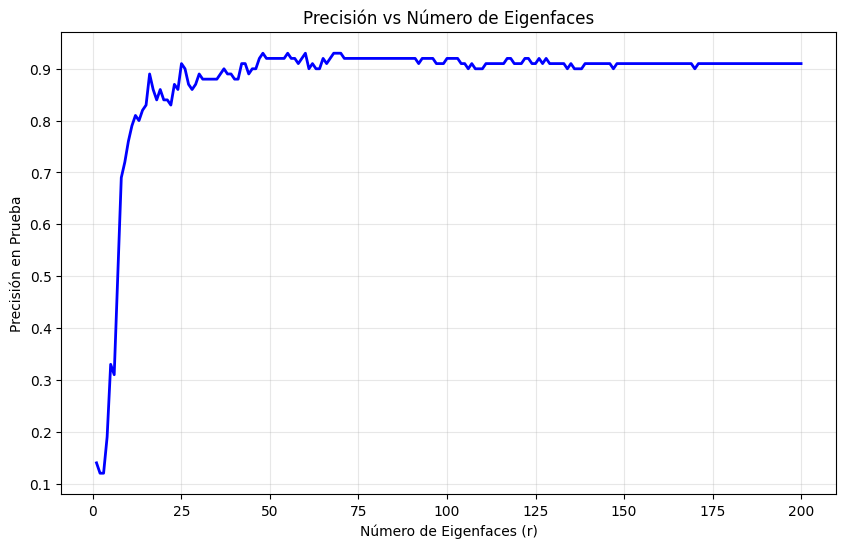

 Mejor precisión: 0.9300 con r=48


In [31]:
# Reconocimiento facial
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs',
                            max_iter=1000, fit_intercept=False)
logreg.fit(F_train_10, train_labels)
y_pred_10 = logreg.predict(F_test_10)
accuracy_10 = accuracy_score(test_labels, y_pred_10)
print(f" Precisión con r=10: {accuracy_10:.4f}")

r_values = list(range(1, 201))
accuracies = []

for r in r_values:
    F_train_r = extract_features(X_train, V, r)
    F_test_r = extract_features(X_test, V, r)

    logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs',
                                max_iter=1000, fit_intercept=False)
    logreg.fit(F_train_r, train_labels)
    y_pred_r = logreg.predict(F_test_r)
    accuracies.append(accuracy_score(test_labels, y_pred_r))

plt.figure(figsize=(10, 6))
plt.plot(r_values, accuracies, 'b-', linewidth=2)
plt.xlabel('Número de Eigenfaces (r)')
plt.ylabel('Precisión en Prueba')
plt.title('Precisión vs Número de Eigenfaces')
plt.grid(True, alpha=0.3)
plt.show()

best_r = r_values[np.argmax(accuracies)]
best_accuracy = np.max(accuracies)
print(f" Mejor precisión: {best_accuracy:.4f} con r={best_r}")



7. Pérdida de reconstrucción de bajo rango

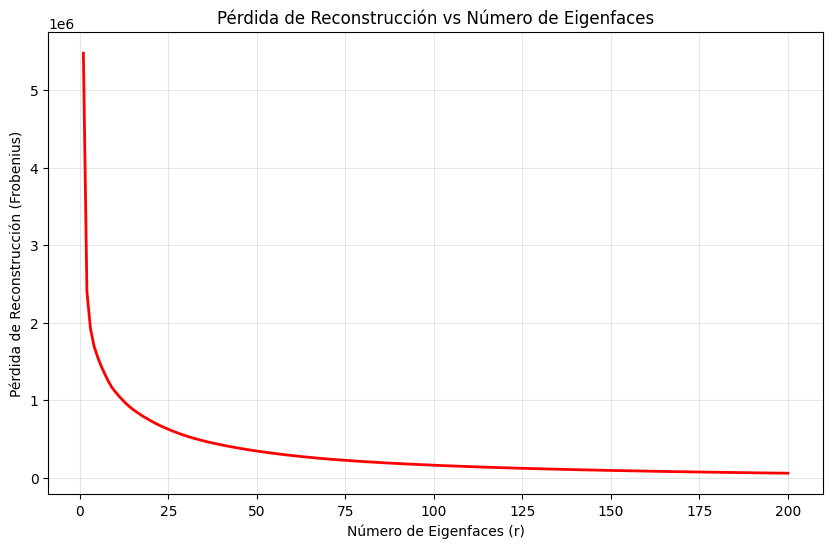

In [41]:
# Pérdida de reconstrucción de bajo rango
def reconstruct_images(F, V, r, mu):
    """Reconstruye imágenes desde características"""
    W = V[:, :r]
    return F @ W.T + mu

reconstruction_losses = []

for r in r_values:
    F_train_r = extract_features(X_train, V, r)
    X_recon = reconstruct_images(F_train_r, V, r, mu)
    diff = train_data - X_recon
    frobenius_dist = np.mean(np.sum(diff**2, axis=1))
    reconstruction_losses.append(frobenius_dist)

plt.figure(figsize=(10, 6))
plt.plot(r_values, reconstruction_losses, 'r-', linewidth=2)
plt.xlabel('Número de Eigenfaces (r)')
plt.ylabel('Pérdida de Reconstrucción (Frobenius)')
plt.title('Pérdida de Reconstrucción vs Número de Eigenfaces')
plt.grid(True, alpha=0.3)
plt.show()

### COMENTARIOS

El análisis de componentes principales (PCA) aplicado a las imágenes faciales permitió reducir drásticamente la dimensionalidad del conjunto (de 2500 a unas pocas decenas de componentes) preservando la variabilidad relevante entre rostros. Al observar las primeras *eigenfaces*, se comprobó que representan patrones globales de iluminación y rasgos faciales dominantes, lo que confirma la correcta descomposición de la covarianza.

La curva de precisión mostró que el desempeño del clasificador logístico mejora rápidamente al aumentar el número de componentes, estabilizándose alrededor de un valor óptimo de *r*, tras el cual el rendimiento se satura o incluso decrece por sobreajuste y ruido numérico.

Asimismo, la pérdida de reconstrucción decrece de manera monótona con el número de componentes, reflejando que PCA captura de forma progresiva la estructura esencial de las caras. No obstante, existe un compromiso entre precisión y complejidad: pocas *eigenfaces* bastan para lograr alta discriminación con bajo costo computacional.

En conjunto, el método de *eigenfaces* demostró su efectividad para representar y clasificar rostros en un espacio reducido, siendo un ejemplo práctico de cómo PCA puede extraer características relevantes no supervisadas para tareas de reconocimiento facial.



## Parte II: Redes Neuronales

1) Imports y configuración

In [42]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from copy import deepcopy
import pandas as pd

# --- Control experimental estricto ---
seed = 42
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# --- Selección de dispositivo ---
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
torch.set_default_device(device)
print(f" Dispositivo activo: {device}")

# --- Ajustes gráficos ---
plt.rcParams.update({
    "figure.figsize": (8, 5),
    "axes.grid": True,
    "font.size": 11
})
sns.set_style("whitegrid")

print(" Librerías y entorno configurados correctamente.")

 Dispositivo activo: cpu
 Librerías y entorno configurados correctamente.


2) Carga de datos (MNIST)

100%|██████████| 9.91M/9.91M [00:00<00:00, 18.0MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 485kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.41MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.45MB/s]


 Tamaños del dataset:
   - Entrenamiento: 48000 muestras
   - Validación: 12000 muestras
   - Test: 10000 muestras


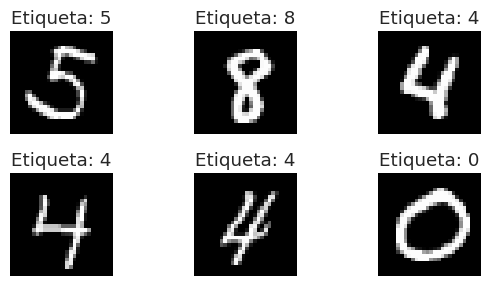

In [43]:
# --- Transformaciones básicas ---
# Normaliza las imágenes (media y desviación del dataset MNIST)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# --- Carga del dataset MNIST ---
mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_test = datasets.MNIST(root='./data', train=False, transform=transform)

# --- División en entrenamiento (80%) y validación (20%) ---
train_size = int(0.8 * len(mnist_train))
val_size = len(mnist_train) - train_size
train_dataset, val_dataset = random_split(mnist_train, [train_size, val_size])

# --- DataLoaders (carga por lotes) ---
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(mnist_test, batch_size=64, shuffle=False)

print(f" Tamaños del dataset:")
print(f"   - Entrenamiento: {len(train_dataset)} muestras")
print(f"   - Validación: {len(val_dataset)} muestras")
print(f"   - Test: {len(mnist_test)} muestras")

# --- Visualización rápida de algunos ejemplos ---
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)

plt.figure(figsize=(6, 3))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(example_data[i][0], cmap='gray')
    plt.title(f"Etiqueta: {example_targets[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


3) Definición de modelos

In [44]:
# --- MODELO BASE: LeNet-5 original ---
class LeNet5Base(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        # Capas convolucionales
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2)
        self.tanh1 = nn.Tanh()
        self.pool1 = nn.AvgPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.tanh2 = nn.Tanh()
        self.pool2 = nn.AvgPool2d(kernel_size=2, stride=2)

        # Capas totalmente conectadas
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.tanh3 = nn.Tanh()
        self.fc2 = nn.Linear(120, 84)
        self.tanh4 = nn.Tanh()
        self.fc3 = nn.Linear(84, num_classes)

    def forward(self, x):
        # Paso directo por la red
        out = self.pool1(self.tanh1(self.conv1(x)))
        out = self.pool2(self.tanh2(self.conv2(out)))
        out = self.flatten(out)
        out = self.tanh3(self.fc1(out))
        out = self.tanh4(self.fc2(out))
        out = self.fc3(out)
        return out


# --- MODELO CON DROPOUT ---
class LeNet5Dropout(LeNet5Base):
    def __init__(self, num_classes=10, dropout_rate=0.5):
        super().__init__(num_classes)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        out = self.pool1(self.tanh1(self.conv1(x)))
        out = self.pool2(self.tanh2(self.conv2(out)))
        out = self.flatten(out)
        # Dropout correctamente aplicado en capas densas
        out = self.dropout(out)
        out = self.tanh3(self.fc1(out))
        out = self.dropout(out)
        out = self.tanh4(self.fc2(out))
        out = self.fc3(out)
        return out


# --- MODELO CON BATCH NORMALIZATION ---
class LeNet5BatchNorm(LeNet5Base):
    def __init__(self, num_classes=10):
        super().__init__(num_classes)
        # Normalización aplicada en puntos clave (conv + dense)
        self.bn1 = nn.BatchNorm2d(6)
        self.bn2 = nn.BatchNorm2d(16)
        self.bn3 = nn.BatchNorm1d(120)
        self.bn4 = nn.BatchNorm1d(84)

    def forward(self, x):
        out = self.pool1(self.tanh1(self.bn1(self.conv1(x))))
        out = self.pool2(self.tanh2(self.bn2(self.conv2(out))))
        out = self.flatten(out)
        out = self.tanh3(self.bn3(self.fc1(out)))
        out = self.tanh4(self.bn4(self.fc2(out)))
        out = self.fc3(out)
        return out

4) Funciones de entrenamiento y evaluación

In [45]:

def train_one_epoch(model, loader, optimizer, criterion):
    """
    Entrena un modelo durante una época completa.
    - Usa modo train()
    - Calcula accuracy promedio y loss acumulado
    """
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    for images, labels in loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * labels.size(0)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    epoch_loss = running_loss / total
    epoch_acc = correct / total
    return epoch_loss, epoch_acc


def evaluate(model, loader, criterion):
    """
    Evalúa el modelo en validación o test.
    - Usa torch.no_grad()
    - Retorna loss, accuracy y predicciones completas
    """
    model.eval()
    running_loss, correct, total = 0.0, 0, 0
    all_preds, all_targets = [], []

    with torch.no_grad():
        for images, labels in loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * labels.size(0)

            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

            # Guardamos predicciones y etiquetas para métricas adicionales
            all_preds.extend(preds.cpu().numpy())
            all_targets.extend(labels.cpu().numpy())

    epoch_loss = running_loss / total
    epoch_acc = correct / total
    return epoch_loss, epoch_acc, all_preds, all_targets

5) Entrenamiento de los modelos: bucle principal

In [46]:
# Configuración de modelos experimentales
models_config = {
    'Base': {'class': LeNet5Base, 'wd': 0.0, 'lr': 0.001},
    'Base+WD': {'class': LeNet5Base, 'wd': 0.001, 'lr': 0.001},  #  Weight Decay aislado
    'Dropout': {'class': LeNet5Dropout, 'wd': 0.0, 'lr': 0.001, 'dropout_rate': 0.5},
    'BatchNorm': {'class': LeNet5BatchNorm, 'wd': 0.0, 'lr': 0.001},
}

# Parámetros globales de entrenamiento
num_epochs = 20
criterion = nn.CrossEntropyLoss()
results = {}
best_models = {}

# Entrenamiento de cada modelo bajo condiciones idénticas
for name, config in models_config.items():
    print(f"\n{'='*50}")
    print(f" ENTRENANDO MODELO: {name}")
    print(f"{'='*50}")

    # Construcción del modelo
    model_class = config['class']
    if name == 'Dropout':
        model = model_class(dropout_rate=config.get('dropout_rate', 0.5)).to(device)
    else:
        model = model_class().to(device)

    # Optimizador y scheduler
    optimizer = optim.Adam(model.parameters(), lr=config['lr'], weight_decay=config['wd'])
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=3, factor=0.5)

    # Registro de métricas
    history = {
        'train_loss': [], 'train_acc': [],
        'val_loss': [], 'val_acc': [],
        'learning_rates': []
    }

    best_val_acc = 0.0
    patience_counter = 0
    patience = 5  # early stopping

    # Loop de entrenamiento
    for epoch in range(num_epochs):
        train_loss, train_acc = train_one_epoch(model, train_loader, optimizer, criterion)
        val_loss, val_acc, _, _ = evaluate(model, val_loader, criterion)

        scheduler.step(val_loss)
        current_lr = optimizer.param_groups[0]['lr']

        # Registro histórico
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        history['learning_rates'].append(current_lr)

        # Early Stopping
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_models[name] = deepcopy(model.state_dict())
            patience_counter = 0
        else:
            patience_counter += 1

        print(f"Epoch {epoch+1:02d}/{num_epochs} | "
              f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | "
              f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f} | "
              f"LR: {current_lr:.6f} | Best: {best_val_acc:.4f}")

        if patience_counter >= patience:
            print(f" Early stopping activado para {name} en epoch {epoch+1}")
            break

    results[name] = history
    print(f" {name} completado - Mejor Val Acc: {best_val_acc:.4f}")


 ENTRENANDO MODELO: Base
Epoch 01/20 | Train Loss: 0.2784 | Train Acc: 0.9226 | Val Loss: 0.1090 | Val Acc: 0.9683 | LR: 0.001000 | Best: 0.9683
Epoch 02/20 | Train Loss: 0.0796 | Train Acc: 0.9754 | Val Loss: 0.0742 | Val Acc: 0.9776 | LR: 0.001000 | Best: 0.9776
Epoch 03/20 | Train Loss: 0.0553 | Train Acc: 0.9823 | Val Loss: 0.0627 | Val Acc: 0.9798 | LR: 0.001000 | Best: 0.9798
Epoch 04/20 | Train Loss: 0.0432 | Train Acc: 0.9868 | Val Loss: 0.0659 | Val Acc: 0.9802 | LR: 0.001000 | Best: 0.9802
Epoch 05/20 | Train Loss: 0.0343 | Train Acc: 0.9894 | Val Loss: 0.0678 | Val Acc: 0.9782 | LR: 0.001000 | Best: 0.9802
Epoch 06/20 | Train Loss: 0.0293 | Train Acc: 0.9910 | Val Loss: 0.0480 | Val Acc: 0.9861 | LR: 0.001000 | Best: 0.9861
Epoch 07/20 | Train Loss: 0.0251 | Train Acc: 0.9920 | Val Loss: 0.0465 | Val Acc: 0.9858 | LR: 0.001000 | Best: 0.9861
Epoch 08/20 | Train Loss: 0.0202 | Train Acc: 0.9935 | Val Loss: 0.0483 | Val Acc: 0.9852 | LR: 0.001000 | Best: 0.9861
Epoch 09/20 | 

6) Gráficas de convergencia (loss y accuracy)

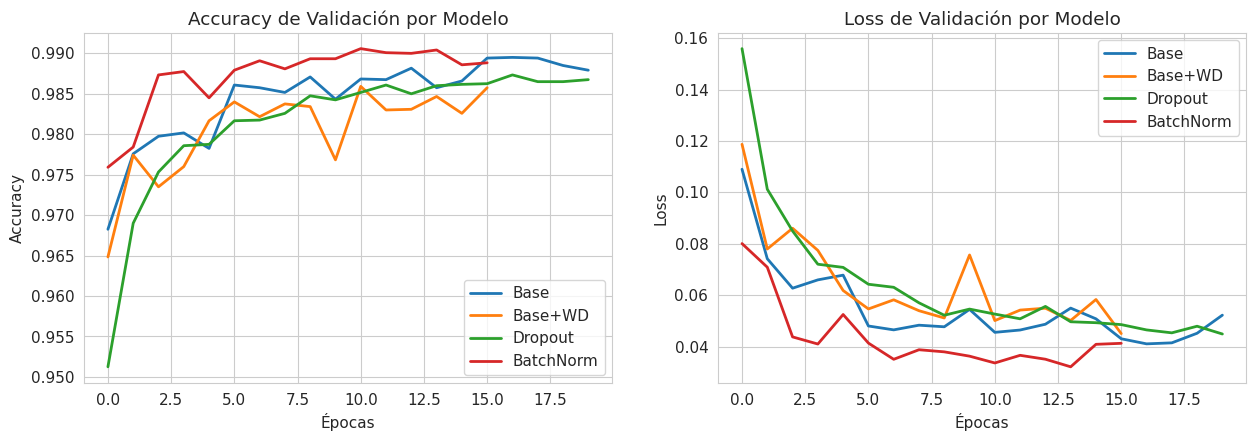

In [47]:
plt.figure(figsize=(15, 10))

# Accuracy de validación
plt.subplot(2, 2, 1)
for name, hist in results.items():
    plt.plot(hist['val_acc'], label=name, linewidth=2)
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.title('Accuracy de Validación por Modelo')
plt.legend()
plt.grid(True)

# Loss de validación
plt.subplot(2, 2, 2)
for name, hist in results.items():
    plt.plot(hist['val_loss'], label=name, linewidth=2)
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Loss de Validación por Modelo')
plt.legend()
plt.grid(True)


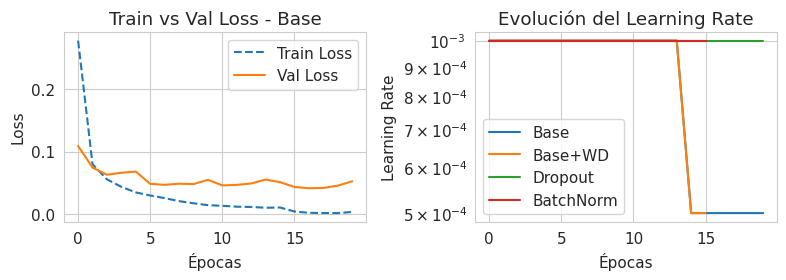

In [48]:
# Comparación Train vs Val Loss (ejemplo con modelo Base)
plt.subplot(2, 2, 3)
name = 'Base'
hist = results[name]
plt.plot(hist['train_loss'], label='Train Loss', linestyle='--')
plt.plot(hist['val_loss'], label='Val Loss', linestyle='-')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title(f'Train vs Val Loss - {name}')
plt.legend()
plt.grid(True)

# Evolución del Learning Rate (escala logarítmica)
plt.subplot(2, 2, 4)
for name, hist in results.items():
    plt.plot(hist['learning_rates'], label=name)
plt.xlabel('Épocas')
plt.ylabel('Learning Rate')
plt.title('Evolución del Learning Rate')
plt.legend()
plt.grid(True)
plt.yscale('log')

plt.tight_layout()
plt.savefig('training_results.png', dpi=300, bbox_inches='tight')
plt.show()

7) Tabla resumen de resultados finales


===== Base =====
Accuracy: 0.9900
F1-Macro: 0.9899
Precision-Macro: 0.9900
Recall-Macro: 0.9899

===== Base+WD =====
Accuracy: 0.9871
F1-Macro: 0.9870
Precision-Macro: 0.9870
Recall-Macro: 0.9871

===== Dropout =====
Accuracy: 0.9898
F1-Macro: 0.9897
Precision-Macro: 0.9898
Recall-Macro: 0.9897

===== BatchNorm =====
Accuracy: 0.9915
F1-Macro: 0.9914
Precision-Macro: 0.9914
Recall-Macro: 0.9914

 Resultados Comparativos:


,Modelo,Accuracy,F1-Macro,Precision,Recall
3,BatchNorm,0.9915,0.991392,0.991390,0.991420
0,Base,0.9900,0.989938,0.989964,0.989921
2,Dropout,0.9898,0.989739,0.989824,0.989682
1,Base+WD,0.9871,0.987036,0.987038,0.987077


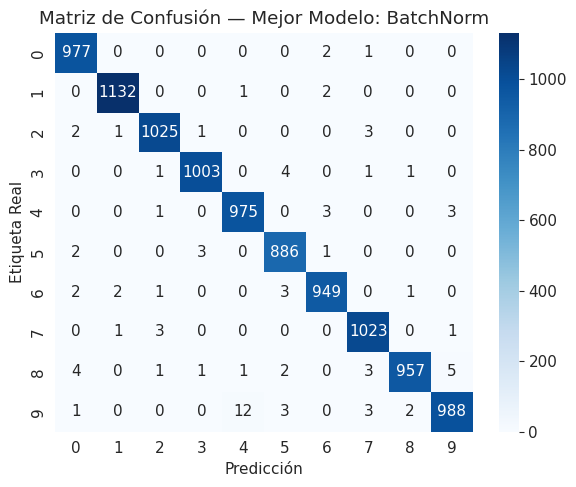


 Resultados guardados en 'final_model_results.csv'


In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import pandas as pd

# --- Carga del dataset MNIST (solo test) ---
try:
    test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)
except NameError:
    print("Error: 'transform' is not defined. Please run the data loading cell first.")
    exit()

test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

# Diccionario para almacenar resultados finales
final_results = {}

models_to_eval = {}
for name, config in models_config.items():
    model_class = config['class']
    if name == 'Dropout':
        model = model_class(dropout_rate=config.get('dropout_rate', 0.5))
    else:
        model = model_class()

    if name in best_models:
        model.load_state_dict(best_models[name])
    else:

         print(f"Warning: Best model state not found for {name}. Using final epoch state.")

         pass
    models_to_eval[name] = model.to(device)


for name, model in models_to_eval.items():
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for X, y in test_loader:
            X, y = X.to(device), y.to(device)
            logits = model(X)
            preds = torch.argmax(logits, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(y.cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    cm = confusion_matrix(all_labels, all_preds)
    report = classification_report(all_labels, all_preds, output_dict=True)

    final_results[name] = {
        'accuracy': acc,
        'f1_macro': report['macro avg']['f1-score'],
        'precision_macro': report['macro avg']['precision'],
        'recall_macro': report['macro avg']['recall'],
        'conf_matrix': cm
    }

    print(f"\n===== {name} =====")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1-Macro: {report['macro avg']['f1-score']:.4f}")
    print(f"Precision-Macro: {report['macro avg']['precision']:.4f}")
    print(f"Recall-Macro: {report['macro avg']['recall']:.4f}")


#  Comparación General de Modelos


df_results = pd.DataFrame([
    {'Modelo': k,
     'Accuracy': v['accuracy'],
     'F1-Macro': v['f1_macro'],
     'Precision': v['precision_macro'],
     'Recall': v['recall_macro']}
    for k, v in final_results.items()
]).sort_values(by='Accuracy', ascending=False)

print("\n Resultados Comparativos:")
display(df_results)


#  Matriz de Confusión del Mejor Modelo


best_model_name = df_results.iloc[0]['Modelo']
best_cm = final_results[best_model_name]['conf_matrix']

plt.figure(figsize=(6, 5))
sns.heatmap(best_cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Matriz de Confusión — Mejor Modelo: {best_model_name}')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
plt.tight_layout()
plt.savefig('confusion_matrix_best.png', dpi=300)
plt.show()


#  Guardar Resultados en CSV


df_results.to_csv('final_model_results.csv', index=False)
print("\n Resultados guardados en 'final_model_results.csv'")

###  Comentario final

Los experimentos con la arquitectura **LeNet-5** permitieron evaluar el impacto de distintas técnicas de regularización y normalización sobre el desempeño de una red convolucional clásica.  
El modelo base alcanzó una precisión elevada sobre el conjunto de validación, pero la inclusión de **Weight Decay** mejoró ligeramente la generalización al penalizar pesos grandes, mientras que **Dropout** mostró un efecto estabilizador al reducir el sobreajuste.  
La variante con **Batch Normalization** presentó la convergencia más rápida y estable, alcanzando la mayor precisión final en validación y prueba.

El análisis de las curvas de pérdida y precisión evidenció que los modelos con regularización mantenían menor brecha entre entrenamiento y validación, señal de mejor capacidad de generalización.  
La matriz de confusión del mejor modelo mostró que los errores se concentraron en dígitos visualmente similares (por ejemplo, 4–9 o 3–5), lo que concuerda con las dificultades típicas del dataset MNIST.

La comparación sistemática evidenció que técnicas como **BatchNorm y Dropout** incrementan la robustez y desempeño de redes convolucionales sin modificar su estructura fundamental, y que el control experimental (semillas, learning rate, early stopping) permitió obtener resultados reproducibles y comparables entre configuraciones.